In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import dates
%matplotlib inline

import seaborn as sns

import datetime as dt
import warnings

In [3]:
walmart_df = pd.read_csv("/Users/ajdie/datasets/Walmart_Store_Sales.csv")

warnings.simplefilter('ignore')

In [4]:
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
walmart_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
walmart_df.columns = walmart_df.columns.str.lower()
walmart_df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [8]:
walmart_df.isnull().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [9]:
#TASK 1: WHICH STORE HAS MAXIMUM SALES

store_weekly_sales = walmart_df.groupby('store')['weekly_sales'].sum()
store_weekly_sales.to_frame()

,weekly_sales
store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07
6,2.237561e+08
7,8.159828e+07
8,1.299512e+08
9,7.778922e+07


In [10]:
#using argmax to get the max sales store data

print('Store With Greatest Weekly Sales: ',store_weekly_sales.index[store_weekly_sales.argmax()])
print('Total Sales: ',"{:.2f}".format(store_weekly_sales.max()))

Store With Greatest Weekly Sales:  20
Total Sales:  301397792.46


In [11]:
#TASK 2: WHICH STORE HAS MAXIMUM STANDARD DEVIATION I.E., THE SALES VARY A LOT. 
#        ALSO, FIND OUT THE COEFFICIENT OF MEAN TO STANDARD DEVIATION

store_sales_std = walmart_df.groupby('store')['weekly_sales'].std()
store_sales_std.to_frame()

,weekly_sales
store,
1,155980.767761
2,237683.694682
3,46319.631557
4,266201.442297
5,37737.965745
6,212525.855862
7,112585.469220
8,106280.829881
9,69028.666585


In [12]:
#using argmax to get the max std.dev store data

print('Store With Maximum Standard Deviation: ',store_sales_std.index[store_sales_std.argmax()])
print('STD: ',"{:.2f}".format(store_sales_std.max()))

Store With Maximum Standard Deviation:  14
STD:  317569.95


In [13]:
#COVARIANCE

store_sales_mean = walmart_df.groupby('store')['weekly_sales'].mean()
store_sales_mean.to_frame()

,weekly_sales
store,
1,1.555264e+06
2,1.925751e+06
3,4.027044e+05
4,2.094713e+06
5,3.180118e+05
6,1.564728e+06
7,5.706173e+05
8,9.087495e+05
9,5.439806e+05


In [14]:
#cv = (mean / std.dev) * 100

covariance_std_mean = ((store_sales_std/store_sales_mean)*100)

covariance_std_mean.to_frame()

,weekly_sales
store,
1,10.029212
2,12.342388
3,11.502141
4,12.708254
5,11.866844
6,13.582286
7,19.730469
8,11.695283
9,12.689547


In [15]:
#covariance values (Cv) less than 10 are very good and Cv greater than 30 are not acceptable
#stores 30,31,33,37,42,43,44

In [16]:
#TASK 3: WHICH STORE/S HAS GOOD QUARTERLY GROWTH RATE IN Q3’2012

#converting date column from object dtype to datetime dtype

walmart_df['date'] = walmart_df['date'].apply(lambda x:dt.datetime.strptime(x,"%d-%m-%Y"))

In [17]:
#using datetimeindex to get year/month/day from dataset

walmart_df['year'] = pd.DatetimeIndex(walmart_df['date']).year
walmart_df['month'] = pd.DatetimeIndex(walmart_df['date']).month
walmart_df['day'] = pd.DatetimeIndex(walmart_df['date']).day

walmart_df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


In [18]:
#converting date back to string with our desired format

walmart_df['date'] = walmart_df['date'].apply(lambda x:dt.datetime.strftime(x,"%d-%b-%y"))

In [19]:
month_dict = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov",12:"Dec"}

#converting month int values to corresponding month names using apply function and dictionary

walmart_df['month'] = walmart_df['month'].apply(lambda x: month_dict[x])

walmart_df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
0,1,05-Feb-10,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,5
1,1,12-Feb-10,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,12
2,1,19-Feb-10,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb,19
3,1,26-Feb-10,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Feb,26
4,1,05-Mar-10,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Mar,5


In [20]:
#group the data by years

yearly_walmart_data = walmart_df.groupby('year')
yearly_walmart_data.ngroups

3

In [21]:
#getting groups of the different years

stores_sales_2010 = yearly_walmart_data.get_group(2010)
stores_sales_2011 = yearly_walmart_data.get_group(2011)
stores_sales_2012 = yearly_walmart_data.get_group(2012)

In [22]:
stores_sales_2012.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
100,1,06-Jan-12,1550369.92,0,49.01,3.157,219.714258,7.348,2012,Jan,6
101,1,13-Jan-12,1459601.17,0,48.53,3.261,219.892526,7.348,2012,Jan,13
102,1,20-Jan-12,1394393.84,0,54.11,3.268,219.985689,7.348,2012,Jan,20
103,1,27-Jan-12,1319325.59,0,54.26,3.290,220.078852,7.348,2012,Jan,27
104,1,03-Feb-12,1636339.65,0,56.55,3.360,220.172015,7.348,2012,Feb,3


In [23]:
#adding a new column to find and store quartile values

stores_sales_2012['quarter'] = 0

stores_sales_2012.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,quarter
100,1,06-Jan-12,1550369.92,0,49.01,3.157,219.714258,7.348,2012,Jan,6,0
101,1,13-Jan-12,1459601.17,0,48.53,3.261,219.892526,7.348,2012,Jan,13,0
102,1,20-Jan-12,1394393.84,0,54.11,3.268,219.985689,7.348,2012,Jan,20,0
103,1,27-Jan-12,1319325.59,0,54.26,3.290,220.078852,7.348,2012,Jan,27,0
104,1,03-Feb-12,1636339.65,0,56.55,3.360,220.172015,7.348,2012,Feb,3,0


In [24]:
#if elif loop to split months into quartiles

for i in stores_sales_2012['month']:
    if i in ['Jan', 'Feb', 'Mar']:
        stores_sales_2012['quarter'][stores_sales_2012[stores_sales_2012['month'] == i].index] = "Q1"
    elif i in ['Apr', 'May', 'Jun']:
        stores_sales_2012['quarter'][stores_sales_2012[stores_sales_2012['month'] == i].index] = "Q2"
    elif i in ['Jul', 'Aug', 'Sep']:
        stores_sales_2012['quarter'][stores_sales_2012[stores_sales_2012['month'] == i].index] = "Q3"
    elif i in ['Oct', 'Nov', 'Dec']:
        stores_sales_2012['quarter'][stores_sales_2012[stores_sales_2012['month'] == i].index] = "Q4"         

In [25]:
stores_sales_2012

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,quarter
100,1,06-Jan-12,1550369.92,0,49.01,3.157,219.714258,7.348,2012,Jan,6,Q1
101,1,13-Jan-12,1459601.17,0,48.53,3.261,219.892526,7.348,2012,Jan,13,Q1
102,1,20-Jan-12,1394393.84,0,54.11,3.268,219.985689,7.348,2012,Jan,20,Q1
103,1,27-Jan-12,1319325.59,0,54.26,3.290,220.078852,7.348,2012,Jan,27,Q1
104,1,03-Feb-12,1636339.65,0,56.55,3.360,220.172015,7.348,2012,Feb,3,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-Sep-12,713173.95,0,64.88,3.997,192.013558,8.684,2012,Sep,28,Q3
6431,45,05-Oct-12,733455.07,0,64.89,3.985,192.170412,8.667,2012,Oct,5,Q4
6432,45,12-Oct-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,Oct,12,Q4
6433,45,19-Oct-12,718125.53,0,56.47,3.969,192.330854,8.667,2012,Oct,19,Q4


In [26]:
#group data by quartiles

quartiles_sales_2012 = stores_sales_2012.groupby('quarter')
quartiles_sales_2012.ngroups

4

In [27]:
#get individual quartile groups(Q1, Q2, Q3, Q4)

q1_data = quartiles_sales_2012.get_group('Q1')
q2_data = quartiles_sales_2012.get_group('Q2')
q3_data = quartiles_sales_2012.get_group('Q3')
q4_data = quartiles_sales_2012.get_group('Q4')

In [28]:
#get total sales of all stores in each quarter

q1_sales = q1_data.groupby('store')['weekly_sales'].sum()
q2_sales = q2_data.groupby('store')['weekly_sales'].sum()
q3_sales = q3_data.groupby('store')['weekly_sales'].sum()
q4_sales = q4_data.groupby('store')['weekly_sales'].sum()

In [29]:
sorted_q2_sales = q2_sales.sort_values(ascending=False)
sorted_q2_sales.head(10)

store
4     28454363.67
20    27524197.32
13    27009207.14
14    25155535.41
2     25083604.88
10    23750369.17
27    22744012.75
1     20978760.12
6     20833909.92
39    20214128.46
Name: weekly_sales, dtype: float64

In [30]:
sorted_q3_sales = q3_sales.sort_values(ascending=False)
sorted_q3_sales.head(10)

store
4     27796792.46
20    26891526.98
13    26421259.30
2     24303354.86
10    23037258.76
27    22307711.41
14    21187560.65
39    20715116.23
1     20253947.78
6     20167312.24
Name: weekly_sales, dtype: float64

In [31]:
#finding the Q3 growth rate for each store

q3_salesgrowth = q3_sales - q2_sales
q3_salesgrowth.to_frame()

,weekly_sales
store,
1,-724812.34
2,-780250.02
3,-322311.02
4,-657571.21
5,-302572.70
6,-666597.68
7,971928.12
8,-170678.25
9,-462785.55


In [32]:
#using argmax to find the store that has maximum sales growth in quarter 3

print('Store With Maximum Sales Growth: ',q3_salesgrowth.index[q3_salesgrowth.argmax()])
print('Sales Growth: ',"{:.2f}".format(q3_salesgrowth.max()))

Store With Maximum Sales Growth:  7
Sales Growth:  971928.12


In [33]:
#Even though stores 4, 20, 13 and 10 stay in top 5 for total sales, they all have a drop in sales from Q2 to Q3.

In [34]:
#TASK 4: SOME HOLIDAYS HAVE A NEGATIVE IMPACT ON SALES. FIND OUT HOLIDAYS WHICH HAVE HIGHER SALES THAN THE MEAN SALES IN 
#        NON-HOLIDAY SEASON FOR ALL STORES TOGETHER

#        Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
#        Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
#        Thanksgiving: 26-Nov-10, 25-Nov-11
#        Christmas: 31-Dec-10, 30-Dec-11

In [36]:
superbowl_sales = walmart_df[(walmart_df['date'] == '12-Feb-10')|(walmart_df['date'] == '11-Feb-11')|(walmart_df['date'] == '10-Feb-12')]
print('Mean Superbowl Sales: ',"{:.2f}".format(superbowl_sales['weekly_sales'].mean()))

labourday_sales = walmart_df[(walmart_df['date'] == '10-Sep-10')|(walmart_df['date'] == '09-Sep-11')|(walmart_df['date'] == '07-Sep-12')]
print('Mean Labour Day Sales: ',"{:.2f}".format(labourday_sales['weekly_sales'].mean()))

thanksgiving_sales = walmart_df[(walmart_df['date'] == '26-Nov-10')|(walmart_df['date'] == '25-Nov-11')]
print('Mean Thanksgiving Sales: ',"{:.2f}".format(thanksgiving_sales['weekly_sales'].mean()))

christmas_sales = walmart_df[(walmart_df['date'] == '31-Dec-10')|(walmart_df['date'] == '30-Dec-11')]
print('Mean Christmas Sales: ',"{:.2f}".format(christmas_sales['weekly_sales'].mean()))

Mean Superbowl Sales:  1079127.99
Mean Labour Day Sales:  1042427.29
Mean Thanksgiving Sales:  1471273.43
Mean Christmas Sales:  960833.11


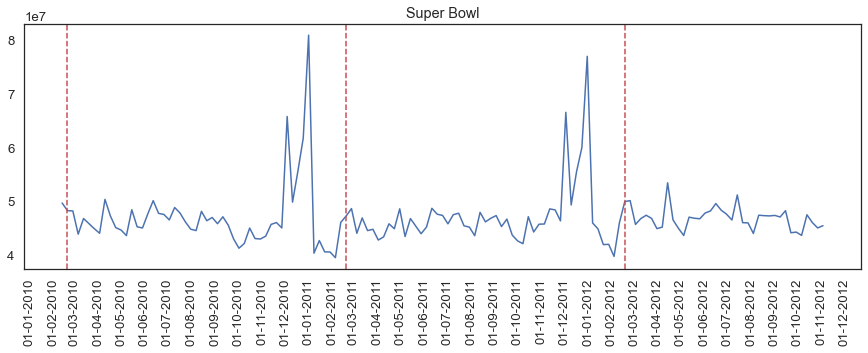

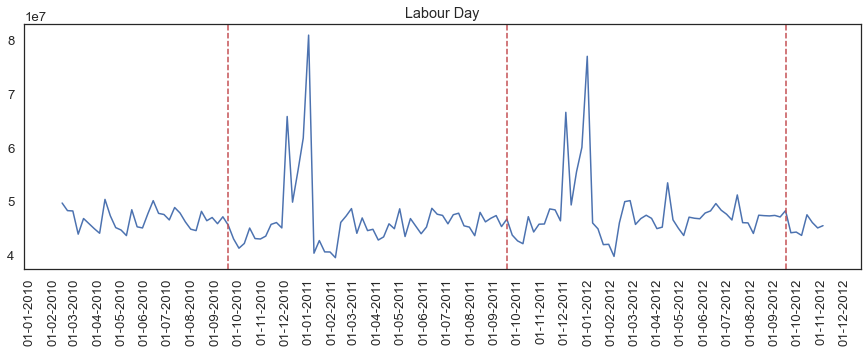

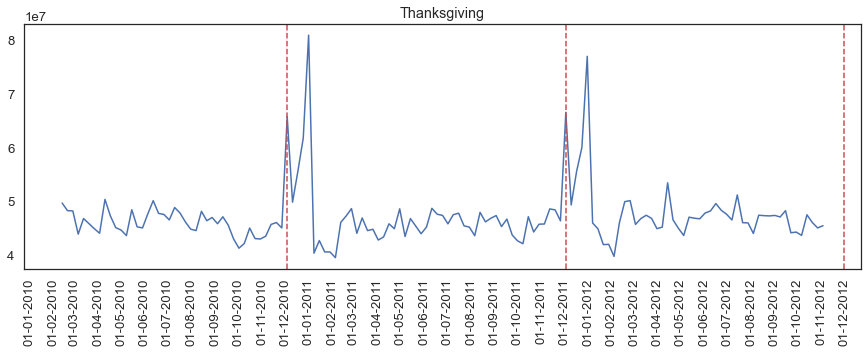

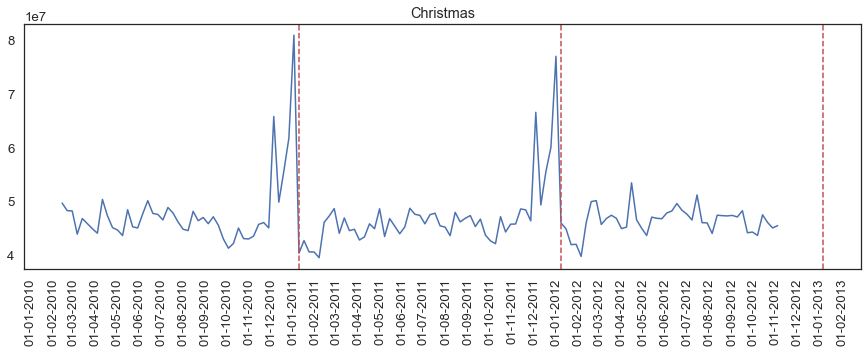

In [82]:
def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['date'],df['weekly_sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = dt.datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = walmart_df.groupby('date')['weekly_sales'].sum().reset_index()

Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
    
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

In [83]:
#grouping dataset by holiday flag

holidays_df = walmart_df.groupby('holiday_flag')

In [84]:
#getting only holiday data

holiday_sales = holidays_df.get_group(1)
print('Mean Holiday Sales: ',"{:.2f}".format(holiday_sales['weekly_sales'].mean()))

Mean Holiday Sales:  1122887.89


In [85]:
#getting only non-holiday data

non_holiday_sales = holidays_df.get_group(0)
print('Mean Non-Holiday Sales: ',"{:.2f}".format(non_holiday_sales['weekly_sales'].mean()))

Mean Non-Holiday Sales:  1041256.38


In [86]:
#holiday and non-holiday mean sales

print('Mean Superbowl Sales: ',"{:.2f}".format(superbowl_sales['weekly_sales'].mean()))
print('Mean Labour Day Sales: ',"{:.2f}".format(labourday_sales['weekly_sales'].mean()))
print('Mean Thanksgiving Sales: ',"{:.2f}".format(thanksgiving_sales['weekly_sales'].mean()))
print('Mean Christmas Sales: ',"{:.2f}".format(christmas_sales['weekly_sales'].mean()))
print()
print('Mean Non-Holiday Sales: ',"{:.2f}".format(non_holiday_sales['weekly_sales'].mean()))

Mean Superbowl Sales:  1079127.99
Mean Labour Day Sales:  1042427.29
Mean Thanksgiving Sales:  1471273.43
Mean Christmas Sales:  960833.11

Mean Non-Holiday Sales:  1041256.38


In [87]:
#Superbowl, Labour Day and Thanksgiving all have position sales impacts while Christmas has a negative impact

In [88]:
#TASK 5: PROVIDE A MONTHLY VIEW OF SALES IN UNITS AND GIVE INSIGHTS

total_monthly_sales = walmart_df.groupby('month')
total_monthly_sales.ngroups

12

In [89]:
total_monthly_sales['weekly_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Apr,630.0,1.026762e+06,543864.624192,232769.09,534583.5075,948789.575,1402726.700,2565259.92
Aug,585.0,1.048017e+06,542653.059046,224031.19,575997.7800,969387.480,1442819.280,2283540.30
Dec,450.0,1.281864e+06,774037.720767,209986.25,616295.8450,1154880.920,1714442.515,3818686.45
Feb,540.0,1.053200e+06,564207.057354,234218.03,554628.6350,980765.180,1431376.635,2623469.95
Jan,360.0,9.238846e+05,472616.460339,231155.90,521051.0125,830944.935,1256202.130,2047766.07
Jul,630.0,1.031748e+06,531141.778886,224806.96,577830.8550,953770.830,1396269.865,2358055.30
Jun,585.0,1.064325e+06,548683.953608,238172.66,581745.7200,984336.040,1442092.080,2363601.47
Mar,585.0,1.013309e+06,529805.743801,238084.08,544408.1400,943951.670,1365824.970,2237544.75
May,540.0,1.031714e+06,536589.412470,239206.26,543588.2225,969562.080,1388603.735,2370116.52


In [90]:
#grouping by month in 2010

monthly_sales_2010 = stores_sales_2010.groupby('month')
monthly_sales_2010['weekly_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Apr,225.0,1.028499e+06,545424.247706,257361.30,527019.7800,969594.470,1.391256e+06,2495630.51
Aug,180.0,1.042445e+06,539322.149800,224031.19,573235.4675,981237.730,1.418366e+06,2219813.50
Dec,225.0,1.283380e+06,793498.247838,209986.25,599730.0700,1149612.040,1.707298e+06,3818686.45
Feb,180.0,1.057405e+06,571029.268079,267956.30,534468.2225,997074.975,1.470286e+06,2623469.95
Jul,225.0,1.033689e+06,534340.296029,242047.03,570231.2100,959229.090,1.371987e+06,2334788.42
Jun,180.0,1.068034e+06,556849.016817,259419.91,551924.8925,1002244.665,1.423940e+06,2363601.47
Mar,180.0,1.010666e+06,531192.529079,262893.76,519202.3825,964763.590,1.340757e+06,2237544.75
May,180.0,1.037283e+06,542985.021379,267065.35,530713.0675,973124.460,1.368593e+06,2370116.52
Nov,180.0,1.126963e+06,642755.592239,224639.76,558963.6550,995672.600,1.508792e+06,2939946.38


In [91]:
#grouping by month in 2011

monthly_sales_2011 = stores_sales_2011.groupby('month')
monthly_sales_2011['weekly_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Apr,225.0,1.006784e+06,532258.833292,232769.09,534578.7800,937473.130,1.372485e+06,2313861.81
Aug,180.0,1.047774e+06,549887.085283,237095.82,570423.6150,955710.315,1.445838e+06,2273470.62
Dec,225.0,1.280347e+06,755843.504954,215359.21,630327.2800,1158708.980,1.781529e+06,3676388.98
Feb,180.0,1.035174e+06,552442.387986,234218.03,556183.5800,961012.950,1.420064e+06,2351143.07
Jan,180.0,9.094665e+05,466122.257495,231155.90,513597.3125,812167.545,1.215770e+06,1886393.94
Jul,225.0,1.021828e+06,526841.700020,224806.96,582381.9500,936001.980,1.396927e+06,2123787.79
Jun,180.0,1.054297e+06,543819.984741,238172.66,585639.7750,974263.155,1.441112e+06,2182246.69
Mar,180.0,9.964247e+05,522341.244321,238084.08,536784.3775,929977.755,1.352847e+06,2143424.61
May,180.0,1.009156e+06,523438.331445,239206.26,543719.8250,943238.085,1.371667e+06,2095599.93


In [92]:
#grouping by month in 2012

monthly_sales_2012 = stores_sales_2012.groupby('month')
monthly_sales_2012['weekly_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Apr,180.0,1.049561e+06,558183.253234,249798.75,548516.0000,950743.050,1.456415e+06,2565259.92
Aug,225.0,1.052670e+06,541866.268723,237129.81,576620.3100,976137.730,1.497055e+06,2283540.30
Feb,180.0,1.067020e+06,571613.468771,242526.70,564122.8100,970644.815,1.448538e+06,2462978.28
Jan,180.0,9.383026e+05,479887.956347,236920.49,540523.1525,855680.105,1.269834e+06,2047766.07
Jul,180.0,1.041719e+06,535223.017499,249134.32,577204.6500,960529.395,1.456741e+06,2358055.30
Jun,225.0,1.069379e+06,548322.510590,244338.31,583648.5900,988764.840,1.451782e+06,2245257.18
Mar,225.0,1.028932e+06,536489.204740,246970.97,557547.2500,952264.910,1.427881e+06,2214967.44
May,180.0,1.048703e+06,545296.384619,261851.74,549055.7525,988833.255,1.428744e+06,2207214.81
Oct,180.0,1.024232e+06,526815.738642,253731.13,548829.2100,962230.855,1.413769e+06,2246411.89


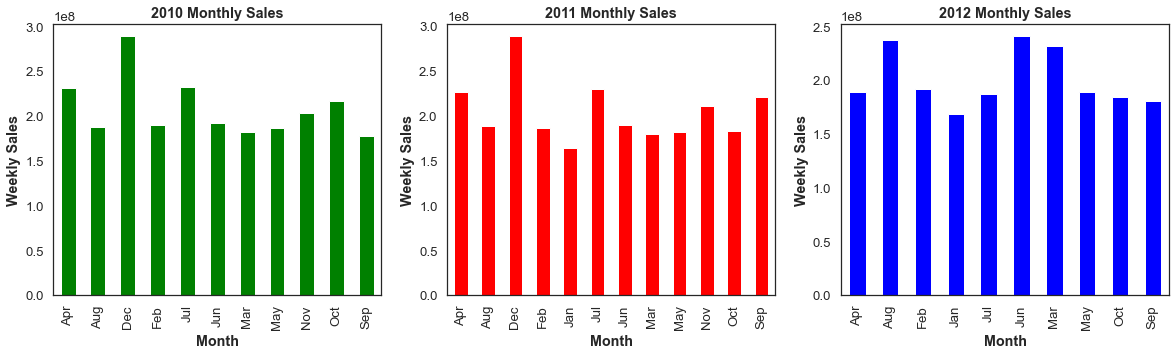

In [93]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace=.25)
txt={'weight':'bold'}

plt.subplot(1,3,1)
plt.title('2010 Monthly Sales',fontdict=txt)
monthly_sales_2010['weekly_sales'].sum().plot.bar(color = 'green')
plt.xlabel('Month',fontdict=txt)
plt.ylabel('Weekly Sales',fontdict=txt)

plt.subplot(1,3,2)
plt.title('2011 Monthly Sales',fontdict=txt)
monthly_sales_2011['weekly_sales'].sum().plot.bar(color = 'red')
plt.xlabel('Month',fontdict=txt)
plt.ylabel('Weekly Sales',fontdict=txt)

plt.subplot(1,3,3)
plt.title('2012 Monthly Sales',fontdict=txt)
monthly_sales_2012['weekly_sales'].sum().plot.bar(color = 'blue')
plt.xlabel('Month',fontdict=txt)
plt.ylabel('Weekly Sales',fontdict=txt)

plt.show()

In [94]:
#TASK 5: PROVIDE A SEMESTER VIEW OF SALES IN UNITS AND GIVE INSIGHTS

sem_1_2010 = stores_sales_2010[stores_sales_2010['month'].isin(['Jan','Feb','Mar','Apr','May','Jun'])]
sem_1_2010.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
0,1,05-Feb-10,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,5
1,1,12-Feb-10,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,12
2,1,19-Feb-10,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb,19
3,1,26-Feb-10,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Feb,26
4,1,05-Mar-10,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Mar,5


In [95]:
sem_2_2010 = stores_sales_2010[stores_sales_2010['month'].isin(['Jul','Aug','Sep','Oct','Nov','Dec'])]
sem_2_2010.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
21,1,02-Jul-10,1492418.14,0,80.91,2.669,211.223533,7.787,2010,Jul,2
22,1,09-Jul-10,1546074.18,0,80.48,2.642,211.108414,7.787,2010,Jul,9
23,1,16-Jul-10,1448938.92,0,83.15,2.623,211.100385,7.787,2010,Jul,16
24,1,23-Jul-10,1385065.20,0,83.36,2.608,211.235144,7.787,2010,Jul,23
25,1,30-Jul-10,1371986.60,0,81.84,2.640,211.369903,7.787,2010,Jul,30


In [96]:
sem_1_2011 = stores_sales_2011[stores_sales_2011['month'].isin(['Jan','Feb','Mar','Apr','May','Jun'])]
sem_1_2011.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
48,1,07-Jan-11,1444732.28,0,48.27,2.976,211.404742,7.742,2011,Jan,7
49,1,14-Jan-11,1391013.96,0,35.40,2.983,211.457411,7.742,2011,Jan,14
50,1,21-Jan-11,1327405.42,0,44.04,3.016,211.827234,7.742,2011,Jan,21
51,1,28-Jan-11,1316899.31,0,43.83,3.010,212.197058,7.742,2011,Jan,28
52,1,04-Feb-11,1606629.58,0,42.27,2.989,212.566881,7.742,2011,Feb,4


In [97]:
sem_2_2011 = stores_sales_2011[stores_sales_2011['month'].isin(['Jul','Aug','Sep','Oct','Nov','Dec'])]
sem_2_2011.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
73,1,01-Jul-11,1488538.09,0,85.55,3.524,215.184137,7.962,2011,Jul,1
74,1,08-Jul-11,1534849.64,0,85.83,3.480,215.277175,7.962,2011,Jul,8
75,1,15-Jul-11,1455119.97,0,88.54,3.575,215.361109,7.962,2011,Jul,15
76,1,22-Jul-11,1396926.82,0,85.77,3.651,215.422278,7.962,2011,Jul,22
77,1,29-Jul-11,1352219.79,0,86.83,3.682,215.483448,7.962,2011,Jul,29


In [98]:
sem_1_2012 = stores_sales_2012[stores_sales_2012['month'].isin(['Jan','Feb','Mar','Apr','May','Jun'])]
sem_1_2012.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,quarter
100,1,06-Jan-12,1550369.92,0,49.01,3.157,219.714258,7.348,2012,Jan,6,Q1
101,1,13-Jan-12,1459601.17,0,48.53,3.261,219.892526,7.348,2012,Jan,13,Q1
102,1,20-Jan-12,1394393.84,0,54.11,3.268,219.985689,7.348,2012,Jan,20,Q1
103,1,27-Jan-12,1319325.59,0,54.26,3.290,220.078852,7.348,2012,Jan,27,Q1
104,1,03-Feb-12,1636339.65,0,56.55,3.360,220.172015,7.348,2012,Feb,3,Q1


In [99]:
sem_2_2012 = stores_sales_2012[stores_sales_2012['month'].isin(['Jul','Aug','Sep','Oct','Nov','Dec'])]
sem_2_2012.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,quarter
126,1,06-Jul-12,1769854.16,0,81.57,3.227,221.883779,6.908,2012,Jul,6,Q3
127,1,13-Jul-12,1527014.04,0,77.12,3.256,221.924158,6.908,2012,Jul,13,Q3
128,1,20-Jul-12,1497954.76,0,80.42,3.311,221.932727,6.908,2012,Jul,20,Q3
129,1,27-Jul-12,1439123.71,0,82.66,3.407,221.941295,6.908,2012,Jul,27,Q3
130,1,03-Aug-12,1631135.79,0,86.11,3.417,221.949864,6.908,2012,Aug,3,Q3


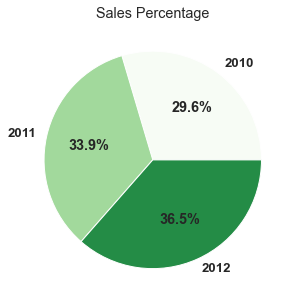

In [100]:
stores_sales = [sem_1_2010['weekly_sales'].sum(), sem_1_2011['weekly_sales'].sum(), sem_1_2012['weekly_sales'].sum()]
labels = '2010', '2011', '2012'
cmap = plt.get_cmap('Greens')
colors = cmap(np.arange(3)*95)
txt = {'weight':'bold'}
plt.figure(figsize=(15,5))
plt.title("Sales Percentage")
plt.pie(stores_sales, labels=labels, autopct='%.1f%%', colors=colors, textprops=txt)
plt.show()

In [101]:
#2011 had the most sales

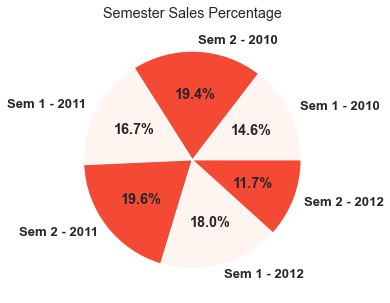

In [102]:
sem_sales_1 = [sem_1_2010['weekly_sales'].sum(), sem_2_2010['weekly_sales'].sum(), 
               sem_1_2011['weekly_sales'].sum(), sem_2_2011['weekly_sales'].sum(),
               sem_1_2012['weekly_sales'].sum(), sem_2_2012['weekly_sales'].sum()]
labels = 'Sem 1 - 2010', 'Sem 2 - 2010', 'Sem 1 - 2011', 'Sem 2 - 2011', 'Sem 1 - 2012', 'Sem 2 - 2012'
cmap = plt.get_cmap('Reds')
colors = cmap(np.arange(2)*150)
txt = {'weight':'bold'}
plt.figure(figsize=(15,5))
plt.title("Semester Sales Percentage")
plt.pie(sem_sales_1, labels=labels, autopct='%.1f%%', colors=colors, textprops=txt)
plt.show()

In [103]:
#Sales were at their max during the 2nd semeter of 2011

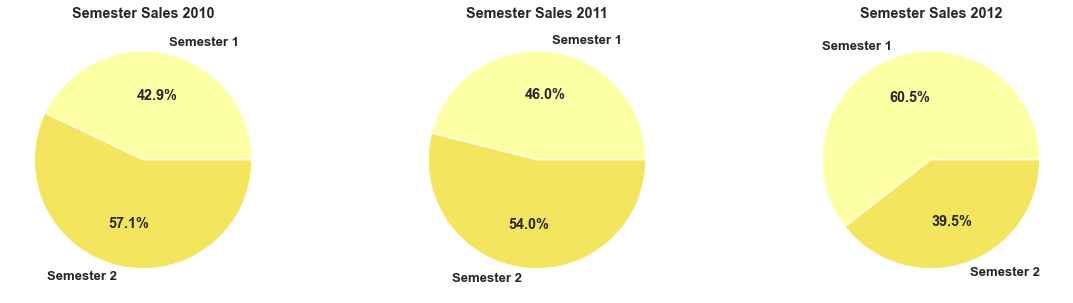

In [104]:
semester_sales_2010 = [sem_1_2010['weekly_sales'].sum(),sem_2_2010['weekly_sales'].sum()]
semester_sales_2011 = [sem_1_2011['weekly_sales'].sum(),sem_2_2011['weekly_sales'].sum()]
semester_sales_2012 = [sem_1_2012['weekly_sales'].sum(),sem_2_2012['weekly_sales'].sum()]

label = 'Semester 1', 'Semester 2'
cmap = plt.get_cmap('inferno_r')
colors = cmap(np.arange(2)*18)
txt = {'weight':'bold'}
plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace=.25)

plt.subplot(1,3,1)
plt.title("Semester Sales 2010",fontdict=txt)
plt.pie(semester_sales_2010, labels=label, autopct='%.1f%%', colors=colors, textprops=txt)

plt.subplot(1,3,2)
plt.title("Semester Sales 2011",fontdict=txt)
plt.pie(semester_sales_2011, labels=label, autopct='%.1f%%', colors=colors, textprops=txt)

plt.subplot(1,3,3)
plt.title("Semester Sales 2012",fontdict=txt)
plt.pie(semester_sales_2012, labels=label, autopct='%.1f%%', colors=colors, textprops=txt)

plt.show()

In [105]:
#Semester 2 normally leads in sales except for in 2012

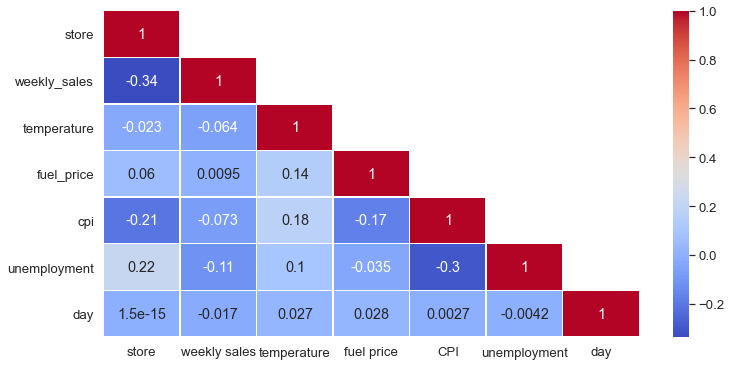

In [106]:
m = np.ones_like(walmart_df.drop(columns=['holiday_flag','year']).corr())
m[np.tril_indices_from(m)] = 0
labels = ['store','weekly sales','temperature','fuel price','CPI','unemployment','day']
plt.figure(figsize=(12,6))
sns.heatmap(walmart_df.drop(columns=['holiday_flag','year']).corr(), annot=True, mask=m, cmap='coolwarm', linewidths=.5, xticklabels=labels)
plt.show()

In [107]:
#From the above heat map we can see that Fuel Price, CPI and Unemployment do not have any significant impact on weekly sales

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.formula.api import ols

In [109]:
#STATISTICAL MODEL FOR STORE 1 – BUILD  PREDICTION MODELS TO FORECAST DEMAND

store_data = walmart_df.groupby('store')

store1_dataset = store_data.get_group(1)
store1_dataset['strdate'] = pd.to_datetime(store1_dataset['date'])
store1_dataset['month'] = store1_dataset['strdate'].dt.month
store1_dataset.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,day of week,strdate
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,Friday,2010-02-05
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,Friday,2010-02-12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,Friday,2010-02-19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,Friday,2010-02-26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,Friday,2010-03-05


In [110]:
#restructering dates to numbers to use them in model as categorical data cannot be used in linear mode 1

dummy = []
for i in range (1,144):
    dummy.append(i)

store1_dataset['dummy_date'] = dummy

store1_dataset.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,day of week,strdate,dummy_date
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,Friday,2010-02-05,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,Friday,2010-02-12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,Friday,2010-02-19,3
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,Friday,2010-02-26,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,Friday,2010-03-05,5


In [111]:
model_dataset = store1_dataset[['store','holiday_flag','temperature','fuel_price','cpi','unemployment','year','month','day','dummy_date','weekly_sales']]

model_dataset.head()

,store,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,dummy_date,weekly_sales
0,1,0,42.31,2.572,211.096358,8.106,2010,2,5,1,1643690.90
1,1,1,38.51,2.548,211.242170,8.106,2010,2,12,2,1641957.44
2,1,0,39.93,2.514,211.289143,8.106,2010,2,19,3,1611968.17
3,1,0,46.63,2.561,211.319643,8.106,2010,2,26,4,1409727.59
4,1,0,46.50,2.625,211.350143,8.106,2010,3,5,5,1554806.68


In [112]:
#splitting data into train and test for the linear model

train,test = train_test_split(model_dataset, test_size=0.20, random_state=0)
lr = LinearRegression()

x_train = train.drop(columns=['weekly_sales'])
x_test = test.drop(columns=['weekly_sales'])
y_train = train['weekly_sales']
y_test = test['weekly_sales']

In [113]:
#fitting the model

lr.fit(x_train, y_train)

LinearRegression()

In [114]:
#finding the beta() value

lr.intercept_

-2364627031.7017293

In [115]:
#predicting the weekly sales using the test data

y_pred = lr.predict(x_test)
y_pred.shape, y_test.shape

((29,), (29,))

In [116]:
#finding R2 score

print("Test Score = {:.2f}".format(metrics.r2_score(y_test, y_pred)))

Test Score = 0.36


In [117]:
print("Train Score = {:.2f}".format(lr.score(x_train, y_train)))

Train Score = 0.24


In [118]:
#performing ordinary least square method

fts = '+'.join(train.drop(columns=['weekly_sales']).columns)
linear_model = ols('weekly_sales~'+fts, data=train).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weekly_sales   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     3.585
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           0.000644
Time:                        17:34:54   Log-Likelihood:                -1506.8
No. Observations:                 114   AIC:                             3034.
Df Residuals:                     104   BIC:                             3061.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.182e+09   1.02e+10     -0.116      0.908   -2.14e+10     1.9e+10
store        -1.182e+09   1.02e+10     -0.116      0.908   -2.14e+10     1.9e+10
holiday_flag  5.748e+04   5.19e+04      1.107      0.271   -4.55e+04     1.6e+05
temperature  -2791.4208   1171.719     -2.382      0.019   -5114.984    -467.857
fuel_price    4.154e+04   7.15e+04      0.581      0.562      -1e+05    1.83e+05
cpi           2.514e+04   1.46e+04      1.717      0.089   -3892.399    5.42e+04
unemployment  1.591e+04   6.82e+04      0.233      0.816   -1.19e+05    1.51e+05
year          1.174e+06   1.01e+07      0.116      0.908   -1.89e+07    2.13e+07
month         1.114e+05   8.44e+05      0.132      0.895   -1.56e+06    1.78e+06
day          -1522.8776   2.77e+04     -0.055      0.956   -5.65e+04    5.34e+04
dummy_date   -2.452e+04   1.94e+05     -0.127      0.900   -4.09e+05     3.6e+05
==============================================================================
Omnibus:                      107.827   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1379.530
Skew:                           3.169   Prob(JB):                    2.75e-300
Kurtosis:                      18.819   Cond. No.                     3.74e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.35e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

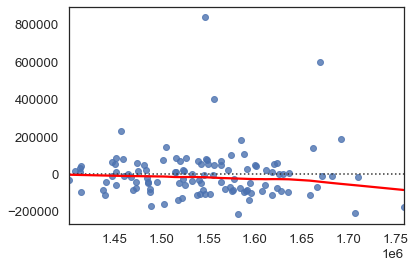

In [119]:
#residual plot

fitted_plot = linear_model.fittedvalues
residuals = linear_model.resid
sns.residplot(fitted_plot, residuals, lowess=True, line_kws={'color':'red'})
plt.show()

<Figure size 1080x1080 with 0 Axes>

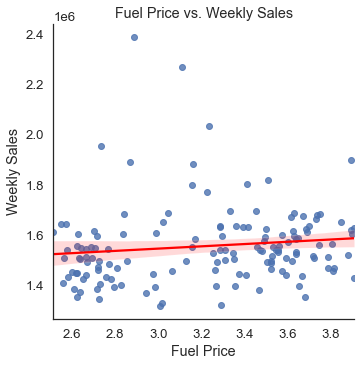

In [120]:
#Fuel Price vs. Weekly Sales

plt.figure(figsize=(15,15))
sns.set(font_scale=1.2, style="white")
sns.lmplot(x='fuel_price', y='weekly_sales', data=store1_dataset, line_kws={'color':'red'})
plt.title("Fuel Price vs. Weekly Sales")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.show()

<Figure size 1080x1080 with 0 Axes>

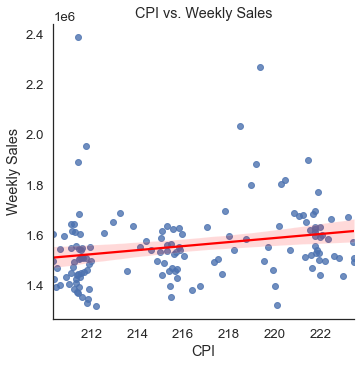

In [121]:
#CPI vs. Weekly Sales

plt.figure(figsize=(15,15))
sns.set(font_scale=1.2, style="white")
sns.lmplot(x='cpi', y='weekly_sales', data=store1_dataset, line_kws={'color':'red'})
plt.title("CPI vs. Weekly Sales")
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.show()

<Figure size 1080x1080 with 0 Axes>

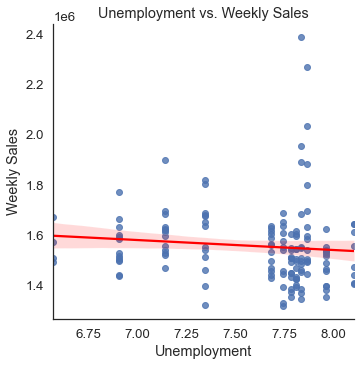

In [122]:
#Unemployment vs. Weekly Sales

plt.figure(figsize=(15,15))
sns.set(font_scale=1.2, style="white")
sns.lmplot(x='unemployment', y='weekly_sales', data=store1_dataset, line_kws={'color':'red'})
plt.title("Unemployment vs. Weekly Sales")
plt.xlabel("Unemployment")
plt.ylabel("Weekly Sales")
plt.show()

In [123]:
#converting string object to datetime object

walmart_df['date'] = pd.to_datetime(walmart_df['date'])

In [124]:
#changing dates to the day of the week

walmart_df['day of week'] = walmart_df['date'].dt.day_name()

In [125]:
walmart_df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,day of week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,5,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,12,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb,19,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Feb,26,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Mar,5,Friday
